<a href="https://colab.research.google.com/github/ansh441/wineTypeDetector/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import *


white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')


In [ ]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
red.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
255,8.0,0.57,0.23,3.2,0.073,17.0,119.0,0.99675,3.26,0.57,9.3,5
494,6.5,0.39,0.23,8.3,0.051,28.0,91.0,0.99520,3.44,0.55,12.1,6
202,6.8,0.50,0.11,1.5,0.075,16.0,49.0,0.99545,3.36,0.79,9.5,5
1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5
1093,9.2,0.31,0.36,2.2,0.079,11.0,31.0,0.99615,3.33,0.86,12.0,7
1517,6.5,0.53,0.06,2.0,0.063,29.0,44.0,0.99489,3.38,0.83,10.3,6
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
289,11.6,0.42,0.53,3.3,0.105,33.0,98.0,1.00100,3.20,0.95,9.2,5
1121,6.6,0.50,0.00,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3,6
1043,9.5,0.39,0.41,8.9,0.069,18.0,39.0,0.99859,3.29,0.81,10.9,7


In [ ]:
white.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3585,7.0,0.24,0.35,1.00,0.032,42.0,104.0,0.98988,3.16,0.37,11.7,7
3555,5.8,0.14,0.15,6.10,0.042,27.0,123.0,0.99362,3.06,0.60,9.9,6
203,6.8,0.26,0.34,13.90,0.034,39.0,134.0,0.99490,3.33,0.53,12.0,6
4321,6.3,0.28,0.22,11.50,0.036,27.0,150.0,0.99445,3.00,0.33,10.6,6
2690,6.9,0.30,0.25,3.30,0.041,26.0,124.0,0.99428,3.18,0.50,9.3,6
3717,6.3,0.18,0.24,3.40,0.053,20.0,119.0,0.99373,3.11,0.52,9.2,6
975,7.6,0.30,0.25,4.30,0.054,22.0,111.0,0.99560,3.12,0.49,9.2,5
4130,6.8,0.29,0.32,1.80,0.032,18.0,130.0,0.99095,3.05,0.62,11.2,6
1135,6.7,0.25,0.34,12.85,0.048,30.0,161.0,0.99860,3.44,0.47,9.5,6
296,8.3,0.39,0.70,10.60,0.045,33.0,169.0,0.99760,3.09,0.57,9.4,5


In [ ]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
pd.isnull(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


Text(0, 0.5, 'Frequency')

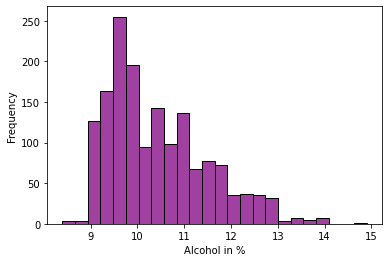

In [ ]:
sns.histplot(data=red,x='alcohol',color='purple')
plt.xlabel("Alcohol in %")
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

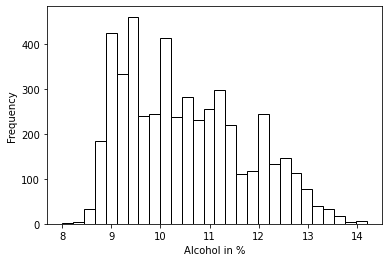

In [ ]:
sns.histplot(data=white,x='alcohol',color='white')
plt.xlabel('Alcohol in %')
plt.ylabel('Frequency')

In [ ]:
red['type']=1
white['type']=0
wines=red.append(white,ignore_index=True)
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [ ]:
X=wines.iloc[:,0:11]
y=np.ravel(wines.type)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=45)
y_test

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from keras.layers import BatchNormalization
model=Sequential()
model.add(Dense(units=12,activation='relu', input_shape=(11,)))

model.add(BatchNormalization())
model.add(Dense(units=9,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.3))
model.add(Dense(units=4,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(units=1,activation='sigmoid')) 

In [ ]:
#from sklearn.metrics import *
model.output_shape
model.summary()
model.get_config()
model.get_weights()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 12)                144       
                                                                 
 batch_normalization_9 (Batc  (None, 12)               48        
 hNormalization)                                                 
                                                                 
 dense_40 (Dense)            (None, 9)                 117       
                                                                 
 batch_normalization_10 (Bat  (None, 9)                36        
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 9)                 0         
                                                                 
 dense_41 (Dense)            (None, 4)               

In [ ]:
model.fit(X_train,y_train,epochs=3,batch_size=1,verbose=1)
prediction=model.predict(X_test)
prediction


Epoch 1/3
4547/4547 [==============================] - 19s 4ms/step - loss: 0.5534 - accuracy: 0.7590
Epoch 2/3
4547/4547 [==============================] - 10s 2ms/step - loss: 0.5530 - accuracy: 0.7590
Epoch 3/3
4547/4547 [==============================] - 9s 2ms/step - loss: 0.5533 - accuracy: 0.7590


array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
score=model.evaluate(X_test,y_test,verbose=1)
score[1]*(10**2)





61/61 [==============================] - 0s 3ms/step - loss: 2935.5403 - accuracy: 0.9431


94.30769085884094